In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [4]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy['Glucose'] = diabetes_df_copy['Glucose'].replace(0,np.NaN)
diabetes_df_copy['BloodPressure'] = diabetes_df_copy['BloodPressure'].replace(0,np.NaN)
diabetes_df_copy['SkinThickness'] = diabetes_df_copy['SkinThickness'].replace(0,np.NaN)
diabetes_df_copy['Insulin'] = diabetes_df_copy['Insulin'].replace(0,np.NaN)
diabetes_df_copy['BMI'] = diabetes_df_copy['BMI'].replace(0,np.NaN)

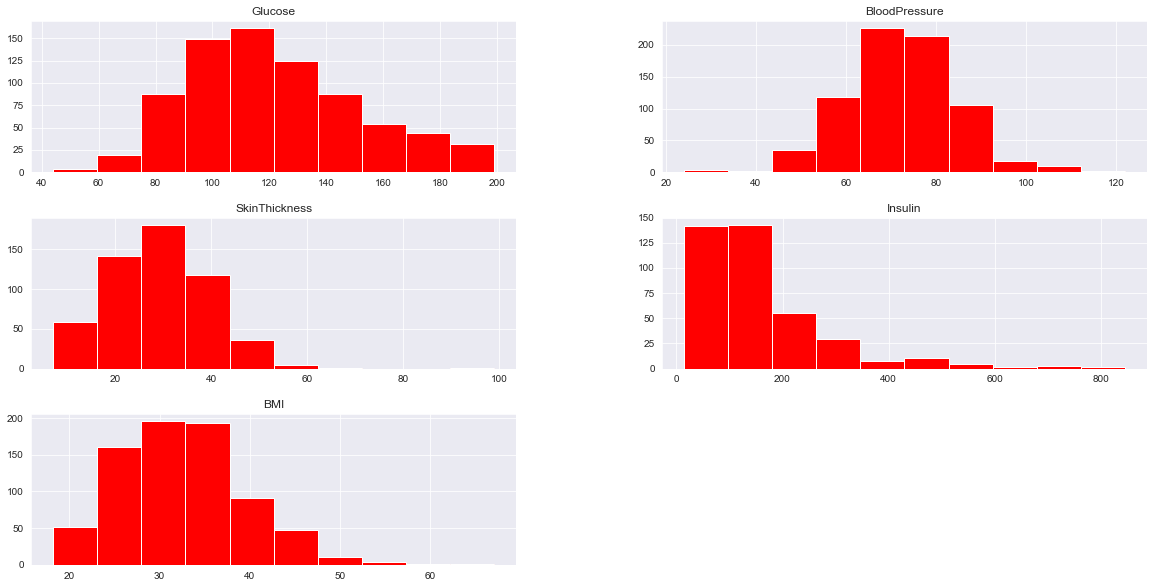

In [8]:
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(figsize = (20,10), color = 'red')
plt.show()

In [9]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

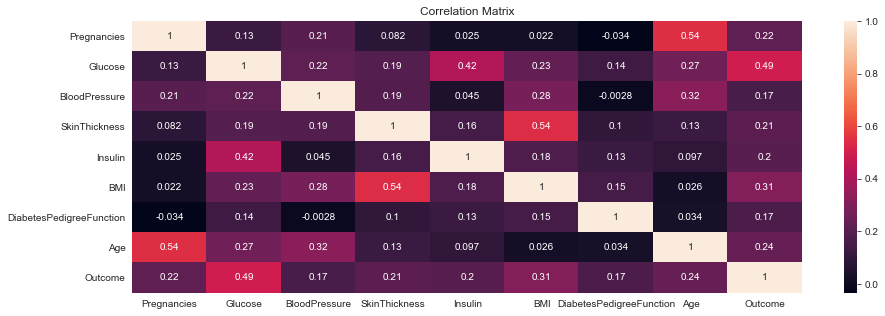

In [10]:
sns.heatmap(diabetes_df_copy.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

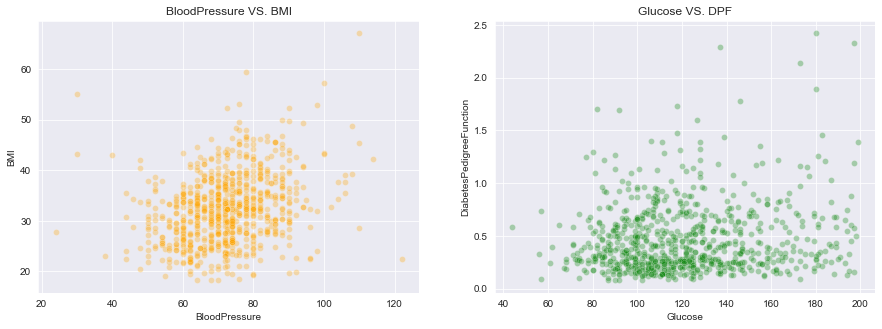

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.scatterplot(x='BloodPressure', y='BMI', data=diabetes_df_copy, alpha=0.3, ax=axes[0], color = 'orange')
axes[0].set_title('BloodPressure VS. BMI')

sns.scatterplot(x='Glucose', y='DiabetesPedigreeFunction', data=diabetes_df_copy, alpha=0.3, ax=axes[1], color ='green')
axes[1].set_title('Glucose VS. DPF')

plt.show()

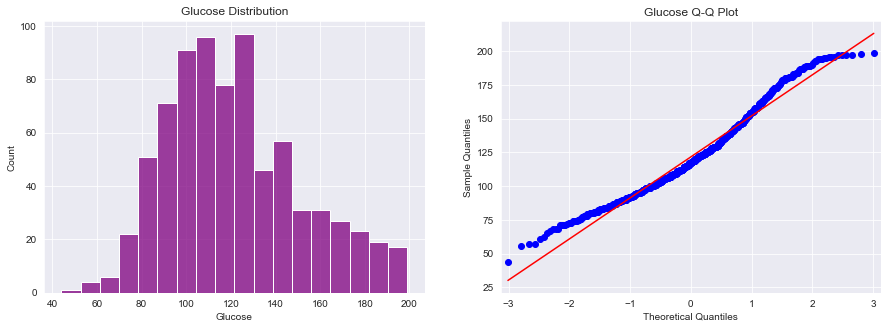

Shapiro-Wilk: 
w:0.969902515411377, p-value:1.7774986343921384e-11

Kolmogorov-Smirnov: 
d:0.969902515411377, p-value:0.0

Skewness of the data: 
0.531677628850459



In [23]:
import statsmodels.api as sm
import scipy
import pylab

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(diabetes_df_copy['Glucose'], ax=axes[0], color = 'purple')
axes[0].set_title('Glucose Distribution')

sm.qqplot(diabetes_df_copy['Glucose'], line='s', ax=axes[1])
axes[1].set_title('Glucose Q-Q Plot')

pylab.show()

w, p_val = scipy.stats.shapiro(diabetes_df_copy['Glucose'])
print('Shapiro-Wilk: \nw:{}, p-value:{}\n'.format(w,p_val))

d, p_val = scipy.stats.kstest(diabetes_df_copy['Glucose'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w,p_val))

print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['Glucose'])))

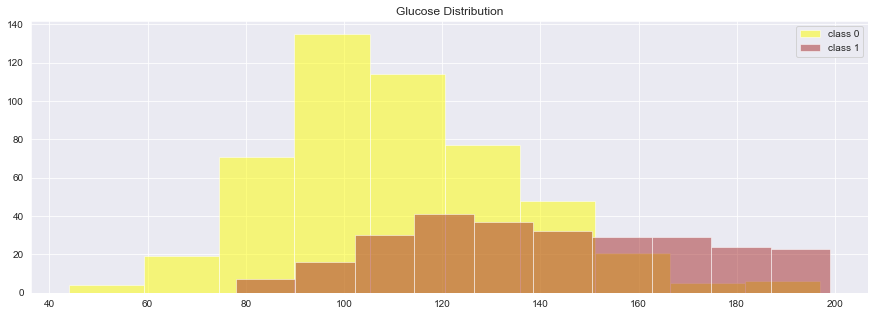

In [24]:
class_zero = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 0)]
class_one = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 1)]

plt.hist(x=class_zero['Glucose'], label='class 0', alpha=0.5, color = 'yellow')
plt.hist(x=class_one['Glucose'], label='class 1', alpha=0.5, color = 'brown')
plt.legend()
plt.title('Glucose Distribution')

plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

X = diabetes_df_copy.drop('Outcome', axis=1)
y = diabetes_df_copy['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


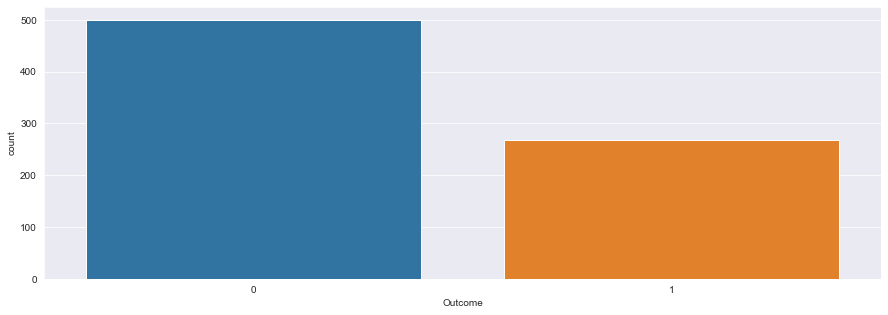

In [16]:
sns.countplot(x=diabetes_df_copy['Outcome'])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

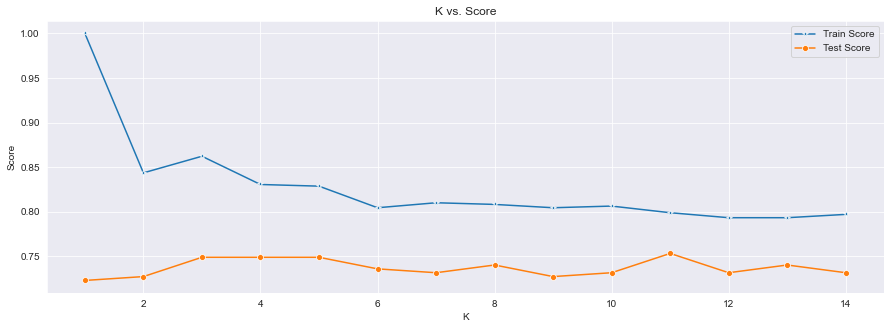

In [19]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [20]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7532467532467533

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

[[127  23]
 [ 34  47]]
